In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from scipy import stats

### Importing the Data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [9]:
df.head()

,price,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [16]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.shape

(21597, 21)

***Columns of interest*** = 1) price, condition, grade, years, zipcode , sqft_living?

In [3]:
df = df.set_index('price').reset_index()

In [19]:
df.head() 

,price,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Understanding

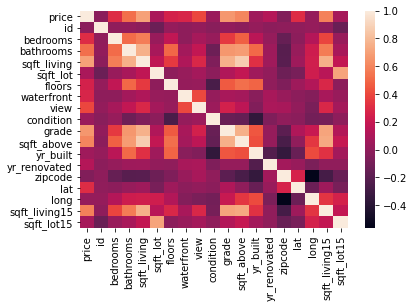

In [4]:
correraltion = df.corr()
sns.heatmap(correraltion);


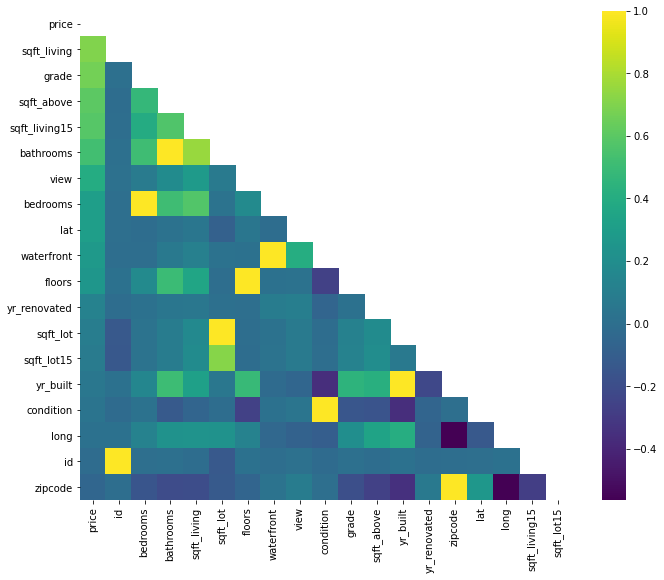

In [5]:
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(correraltion, dtype=np.bool))

correraltion = correraltion.sort_values(by='price', ascending=False)

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(correraltion, mask=mask, ax=ax1, cmap="viridis");

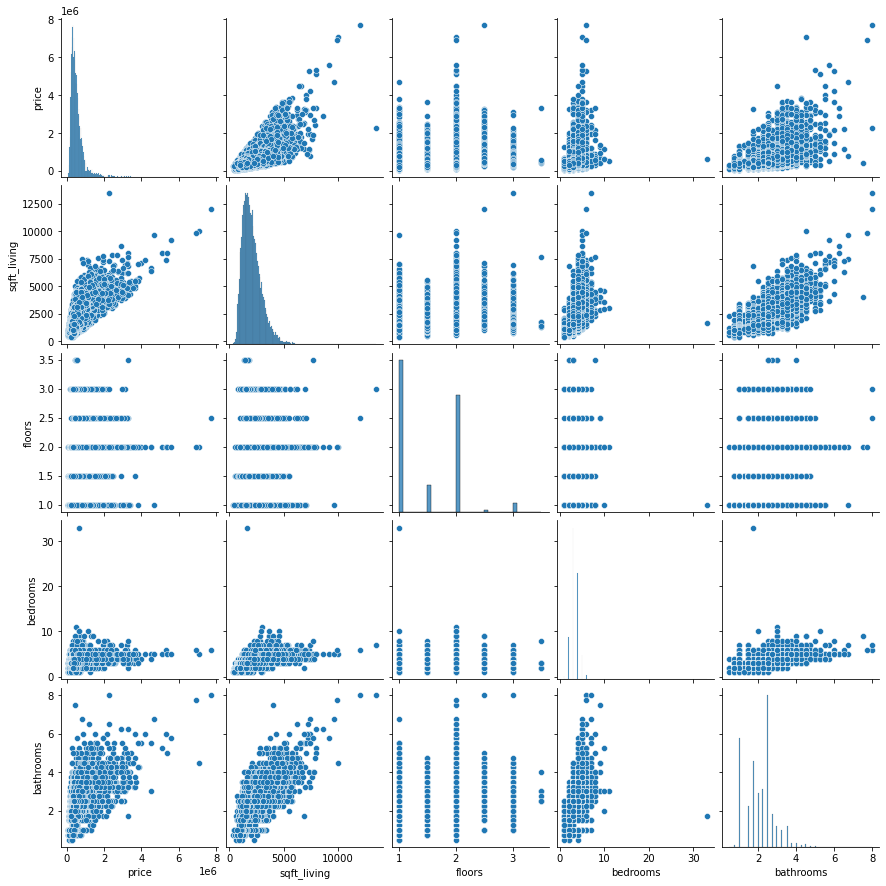

In [6]:
positively_correlated_cols = ['price', 'sqft_living', 'floors', 'bedrooms', 'bathrooms']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average house price')

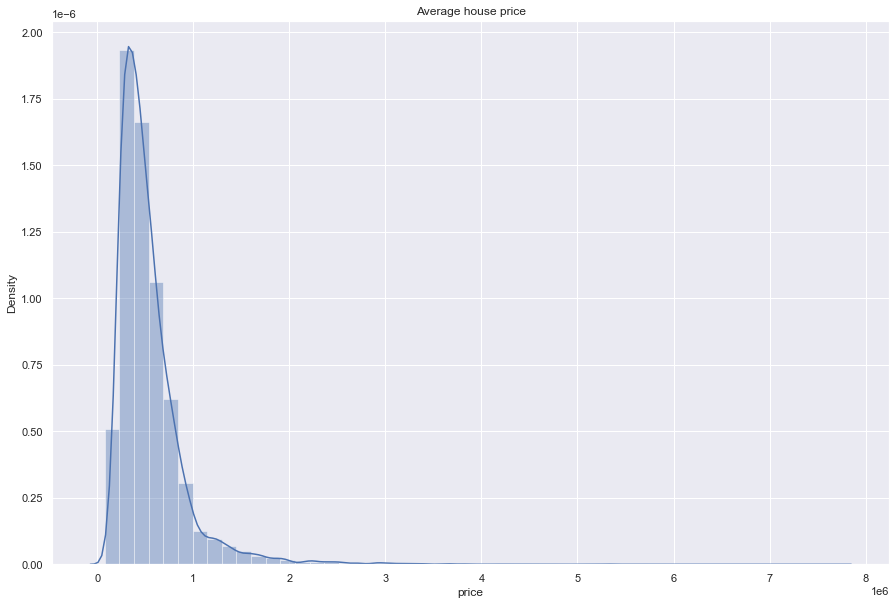

In [33]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['price']).set_title('Average house price')

# 1) Simple Model

In [7]:
fsm_df = df[["sqft_living", "price"]].copy()
fsm_df.dropna(inplace=True)

In [8]:
fsm = ols(formula= "price ~ sqft_living", data=fsm_df)
fsm_results = fsm.fit()

In [9]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        11:30:48   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

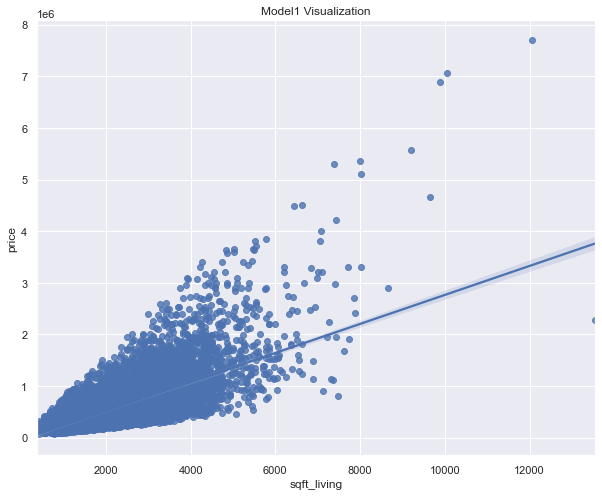

In [53]:
sns.set_theme(color_codes=True)
f, ax = plt.subplots(figsize=(10, 8))


sns.regplot(x="sqft_living", y="price", data=fsm_df, ax=ax).set_title('Model1 Visualization');
plt.savefig('viz1.png')

### Evaluation of Model 1

Model 1 explains about 49% of the variance in sqft_living, that is given only one feature so far and it's statistically significant at an alpha of 0.05.

According to our model:

 - For every 1 unit change in  sqft_living we expect an increase of price on average of $ 281
 

## Checking for the assumptions of linear regression

#### Linearity

Linear regression assumes that the input variable linearly predicts the output variable. 

In [10]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0880045442869073
Rainbow p-value: 5.8947614341769625e-06


- The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. 
- Thus returning a low p-value means that the current model violates the linearity assumption.

#### Model 1 Q-Q plot

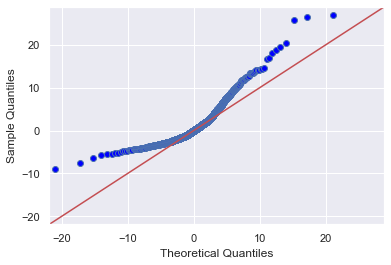

In [12]:
resid = fsm_results.resid
qq1 = sm.qqplot(resid, line ='45', fit=True, dist=stats.t)

#### Normality

Linear regression assumes that the residuals are normally distributed.  It is possible to check this qualitatively with a Q-Q plot, and how assess it statistically.

The [Jarque-Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) test is performed automatically as part of the model summary output, labeled **Jarque-Bera (JB)** and **Prob(JB)**. (0.00)

The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not.  Thus returning a low p-value means that the current model violates the normality assumption.

#### Homoscadasticity

Linear regression assumes that the variance of the dependent variable is homogeneous across different value of the independent variable(s).  We can visualize this by looking at the predicted price vs. the residuals.

In [56]:
y = fsm_df["price"]

y_hat = fsm_results.predict()

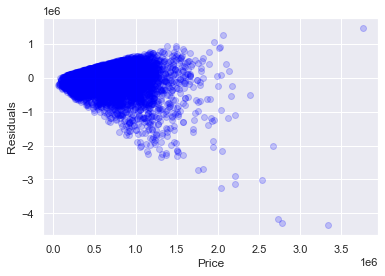

In [57]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Price",
        ylabel="Residuals")
ax2.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

Let's also run a statistical test. The Breusch-Pagan test is available from the diagnostic submodule of StatsModels

In [58]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df[["price"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)



Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


- The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.  
- Thus returning a low p-value means that the current model violates the homoscedasticity assumption

In [22]:
#necessary?? 

preds = fsm_results.predict()

In [28]:
def plot_predictions(y_true, y_hat):
    fig, axis = plt.subplots()
    axis.scatter(y_true,y_hat,label='Model Output', alpha=.5, edgecolor='black')
    y_equalsx = np.linspace(0,y_true.max())
    axis.set_xlabel('True')
    axis.set_ylabel('Predicted')
    axis.plot(y_equalsx,y_equalsx,label='Predicted = True',color='black')
    #axis.title('fitnes of model explenation')
    axis.legend();

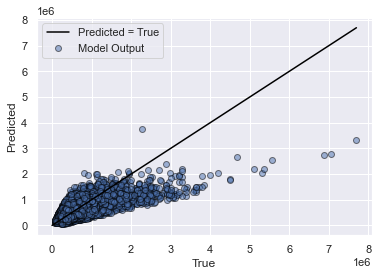

In [29]:
plot_predictions(fsm_df.price,preds)

In [ ]:
fitnes of model explenation

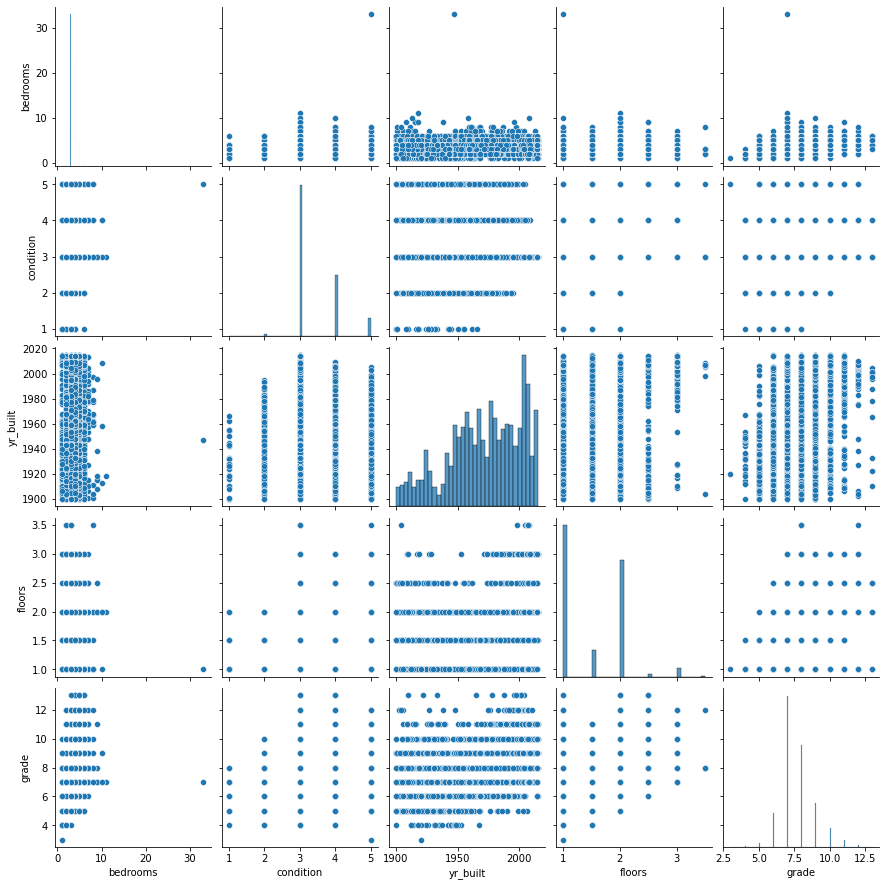

In [9]:
negatively_correlated_cols = [
    'bedrooms',
    'condition',
    'yr_built',
    'floors',
    'grade'
]
negatively_correlated_df = df[negatively_correlated_cols]
sns.pairplot(negatively_correlated_df);

# 2) Adding "floors" to the model

In [13]:
model_2_df = df[["sqft_living", "price", "floors"]].copy()
model_2_df.dropna(inplace=True)

In [14]:
model_2 = ols(formula="price ~ sqft_living + floors", data=model_2_df)
model_2_results = model_2.fit()

In [15]:
model_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.049e+04
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        07:14:40   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.089e+04   5784.516     -8.798      0.000   -6.22e+04   -3.96e+04
sqft_living   279.5098      2.074    134.799      0.000     275.446     283.574
floors       6503.9327   3527.492      1.844      0.065    -410.212    1.34e+04
==============================================================================
Omnibus:                    14847.016   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548710.587
Skew:                           2.830   Prob(JB):                         0.00
Kurtosis:                      27.036   Cond. No.                     8.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizing linear relationships

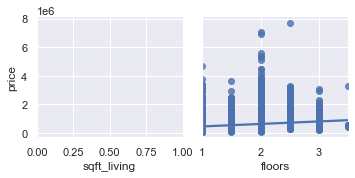

In [41]:
sns.pairplot(df,
            x_vars=['sqft_living', 'floors'],
            y_vars=['price'],
             kind='reg').savefig('test1.png')

We weren't able to find a linear relationship between 

There is a coralation between price & sqft_living, however in our analysis, we could not infer a linear relationship between my used features.

explain bias, categorical values(# floors)?, not manipulated data well, fail assumptions of LR?

### Evaluation of Model 2

According to our model:

 - For 2 houses with the same number of floors we can expect on average a 1 unit increase of sqft_living that would result in a 280 increase in price.
 - Relationship between floors and sale price statistically insignificant 

## Checking for the assumptions of linear regression Model 2

#### Linearity

Linear regression assumes that the input variable linearly predicts the output variable. 

In [21]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_2_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0876721515323673
Rainbow p-value: 6.342420399895958e-06


- The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. 
- Thus returning a low p-value means that the current model violates the linearity assumption.

## Q-Q plot Model2

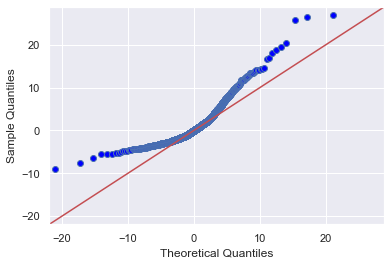

In [37]:
resid = model_2_results.resid
qq2 = sm.qqplot(resid, line ='45', fit=True, dist=stats.t)


#### Normality

Linear regression assumes that the residuals are normally distributed.  It is possible to check this qualitatively with a Q-Q plot, and how assess it statistically.

The [Jarque-Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) test is performed automatically as part of the model summary output, labeled **Jarque-Bera (JB)** and **Prob(JB)**. (0.00)

- The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not.  
- Thus returning a low p-value means that the current model violates the normality assumption.

#### Homoscadasticity

Linear regression assumes that the variance of the dependent variable is homogeneous across different value of the independent variable(s).  We can visualize this by looking at the predicted price vs. the residuals.

In [24]:
y2 = model_2_df["price"]


y_hat_2 = model_2_results.predict()

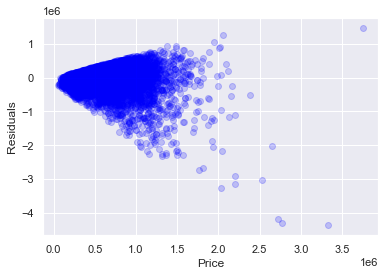

In [26]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Price",
        ylabel="Residuals")
ax2.scatter(x=y_hat_2, y=y_hat_2-y2, color="blue", alpha=0.2);

Let's also run a statistical test. The Breusch-Pagan test is available from the diagnostic submodule of StatsModels

In [36]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y2-y_hat_2, model_2_df[["price"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


- The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.  
- Thus returning a low p-value means that the current model violates the homoscedasticity assumption

# 3) Adding "floors" and "bedrooms" to the model

In [17]:
model_3_df = df[["sqft_living", "price", "floors", 'bedrooms']].copy()
model_3_df.dropna(inplace=True)

In [18]:
model_3 = ols(formula="price ~ sqft_living + floors + bedrooms", data=model_3_df)
model_3_results = model_3.fit()

In [19]:
model_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7398.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        07:21:59   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.704e+04   7684.108     10.026      0.000     6.2e+04    9.21e+04
sqft_living   313.8304      2.467    127.187      0.000     308.994     318.667
floors       3476.4322   3480.340      0.999      0.318   -3345.290    1.03e+04
bedrooms    -5.775e+04   2324.412    -24.846      0.000   -6.23e+04   -5.32e+04
==============================================================================
Omnibus:                    14415.709   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491526.502
Skew:                           2.733   Prob(JB):                         0.00
Kurtosis:                      25.723   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

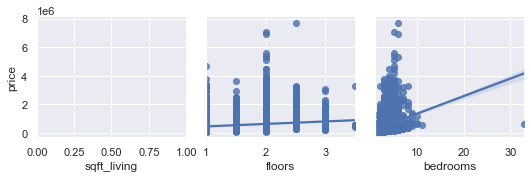

In [35]:
sns.pairplot(df,
            x_vars=['sqft_living', 'floors', 'bedrooms'],
            y_vars=['price'],
             kind='reg')

## Checking for the assumptions of linear regression Model 3

#### Linearity

Linear regression assumes that the input variable linearly predicts the output variable. 

In [20]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_3_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0789344163638657
Rainbow p-value: 3.965079011293994e-05


- The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. 
- Thus returning a low p-value means that the current model violates the linearity assumption.

## Q-Q plot Model3

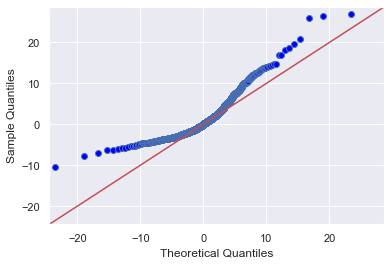

In [22]:
resid = model_3_results.resid
qq3 = sm.qqplot(resid, line ='45', fit=True, dist=stats.t)


#### Normality

Linear regression assumes that the residuals are normally distributed.  It is possible to check this qualitatively with a Q-Q plot, and how assess it statistically.

The [Jarque-Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) test is performed automatically as part of the model summary output, labeled **Jarque-Bera (JB)** and **Prob(JB)**. (0.00)

- The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not.  
- Thus returning a low p-value means that the current model violates the normality assumption.

#### Homoscadasticity

Linear regression assumes that the variance of the dependent variable is homogeneous across different value of the independent variable(s).  We can visualize this by looking at the predicted price vs. the residuals.

In [23]:
y3 = model_3_df["price"]


y_hat_3 = model_3_results.predict()

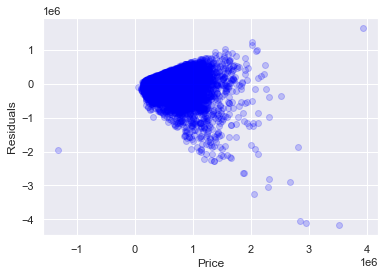

In [25]:
fig3, ax3 = plt.subplots()
ax3.set(xlabel="Price",
        ylabel="Residuals")
ax3.scatter(x=y_hat_3, y=y_hat_3-y3, color="blue", alpha=0.2);

Let's also run a statistical test. The Breusch-Pagan test is available from the diagnostic submodule of StatsModels

In [27]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y3-y_hat_3, model_3_df[["price"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


- The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.  
- Thus returning a low p-value means that the current model violates the homoscedasticity assumption